In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


its a bike sharing dataset which stores the sales data and its aggregated at day/hourly level. At a given hour, 
it will store the total sales, season,temperature,humidity etc

Buid a model which can predict the sales (count) in each hour

In [150]:
test_data= pd.read_csv("test.csv")
#test_data

In [151]:
train_data= pd.read_csv("train.csv")
#train_data

### data profiling and EDA


In [152]:
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [153]:
train_data.shape

(10886, 12)

In [154]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [155]:
train_data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [156]:
train_data.drop(columns=["casual","registered"],axis=1,inplace=True)	

In [157]:
train_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40


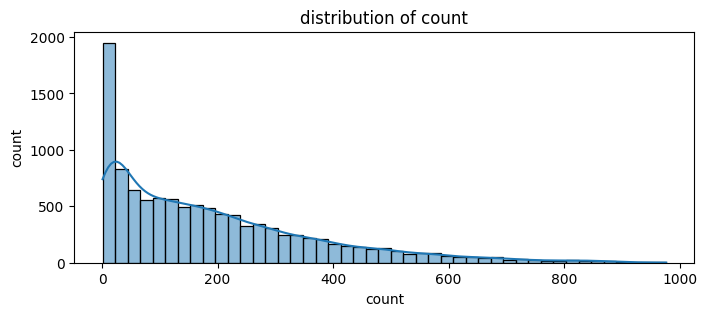

In [158]:
plt.figure(figsize=(8,3))
sns.histplot(data=train_data,x="count",kde=True)
plt.title("distribution of count")
plt.xlabel("count")
plt.ylabel("count")
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_27780\3192444283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=np.log(train_data["count"]+1),kde=True)


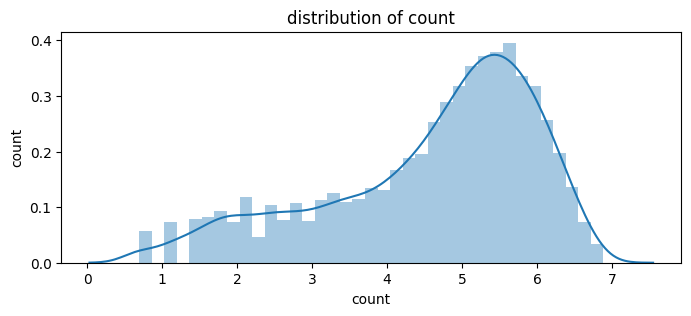

In [159]:
plt.figure(figsize=(8,3))
sns.distplot(x=np.log(train_data["count"]+1),kde=True)
plt.title("distribution of count")
plt.xlabel("count")
plt.ylabel("count")
plt.show()

<Axes: xlabel='season', ylabel='count'>

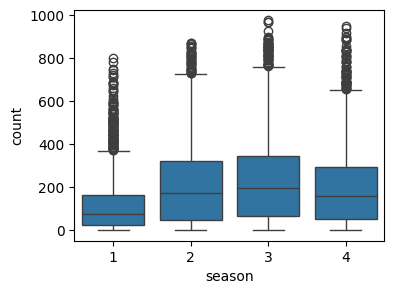

In [160]:
plt.figure(figsize=(4,3))
sns.boxplot(x="season",y="count" ,data=train_data)


In [161]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [162]:
train_data["datetime"]= pd.to_datetime(train_data["datetime"])

In [163]:
train_data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,16


In [164]:
train_data["year"]= train_data["datetime"].dt.year


In [165]:
train_data["month"]=train_data["datetime"].dt.month

In [166]:
train_data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
year                   int32
month                  int32
dtype: object

In [167]:
train_data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,16,2011,1


C:\Users\Sam\AppData\Local\Temp\ipykernel_27780\3171416442.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="month",y="count",data=train_data,estimator=sum,hue="year",ci=False)


<Axes: xlabel='month', ylabel='count'>

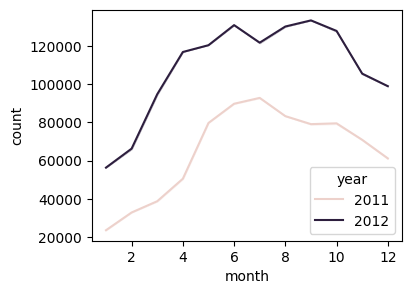

In [168]:
plt.figure(figsize=(4,3))
sns.lineplot(x="month",y="count",data=train_data,estimator=sum,hue="year",ci=False)

In [169]:
train_data.drop(columns=["datetime"],axis=1,inplace=True)

In [170]:
corr=train_data.corr()
corr["count"].sort_values(ascending=False)

count         1.000000
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

<Axes: >

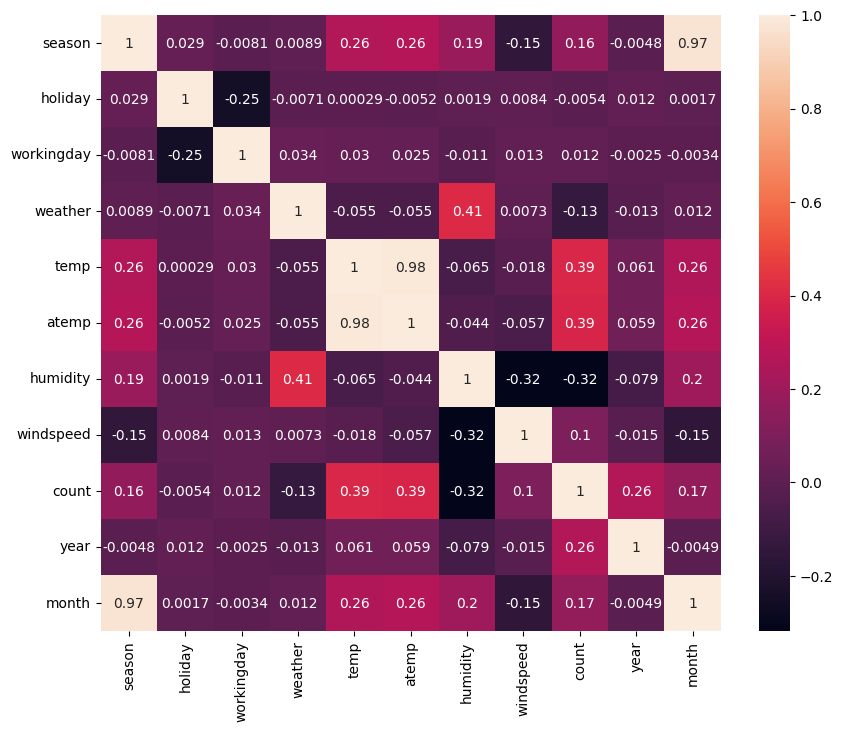

In [171]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [172]:
#train_data.drop(columns=["atemp","month"],axis=1,inplace=True)

In [173]:
train_data["count"]= np.log(train_data["count"])

In [174]:
train_data.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
x=train_data.drop("count",axis=1)
y=train_data["count"]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape



((7620, 10), (3266, 10), (7620,), (3266,))

In [176]:
from xgboost import XGBRegressor
regressor= XGBRegressor(max_depth=4,
    n_estimators=300)
regressor.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)])

[0]	validation_0-rmse:1.38705	validation_1-rmse:1.37552
[1]	validation_0-rmse:1.32602	validation_1-rmse:1.31979
[2]	validation_0-rmse:1.28497	validation_1-rmse:1.28045
[3]	validation_0-rmse:1.25955	validation_1-rmse:1.25838
[4]	validation_0-rmse:1.24304	validation_1-rmse:1.24467
[5]	validation_0-rmse:1.22804	validation_1-rmse:1.23032
[6]	validation_0-rmse:1.21792	validation_1-rmse:1.22290
[7]	validation_0-rmse:1.20966	validation_1-rmse:1.21830
[8]	validation_0-rmse:1.20166	validation_1-rmse:1.21379
[9]	validation_0-rmse:1.19520	validation_1-rmse:1.20859
[10]	validation_0-rmse:1.18961	validation_1-rmse:1.20536
[11]	validation_0-rmse:1.18441	validation_1-rmse:1.20007
[12]	validation_0-rmse:1.18068	validation_1-rmse:1.19889
[13]	validation_0-rmse:1.17695	validation_1-rmse:1.19684
[14]	validation_0-rmse:1.17356	validation_1-rmse:1.19545
[15]	validation_0-rmse:1.17060	validation_1-rmse:1.19420
[16]	validation_0-rmse:1.16945	validation_1-rmse:1.19430
[17]	validation_0-rmse:1.16615	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

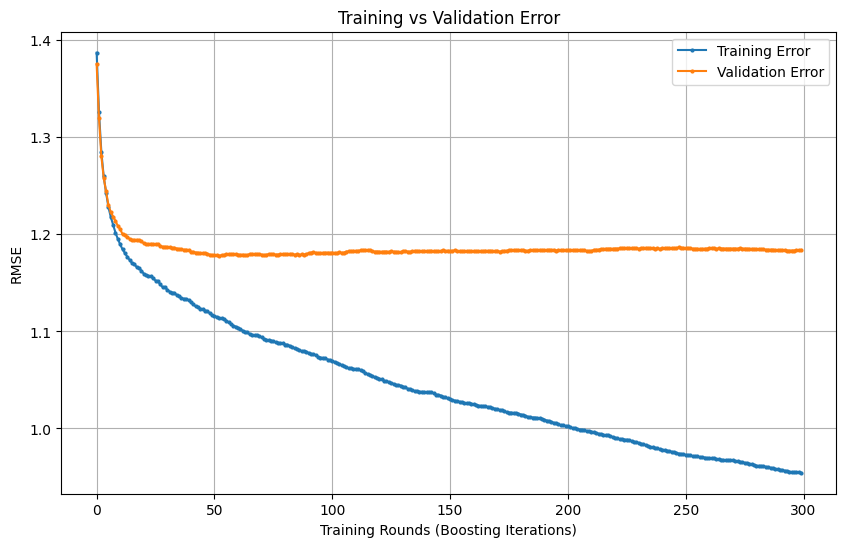

In [177]:
eval_result = regressor.evals_result()
training_round = range(len(eval_result['validation_0']['rmse']))

plt.figure(figsize=(10, 6))
plt.plot(training_round, eval_result['validation_0']['rmse'], label='Training Error', marker='o', markersize=2)
plt.plot(training_round, eval_result['validation_1']['rmse'], label='Validation Error', marker='o', markersize=2)
plt.grid(True)
plt.xlabel('Training Rounds (Boosting Iterations)')
plt.ylabel('RMSE')
plt.title('Training vs Validation Error')
plt.legend()
plt.show()

In [178]:
pred= regressor.predict(x_test)


In [179]:
diff= pred-y_test

<Axes: xlabel='count', ylabel='Count'>

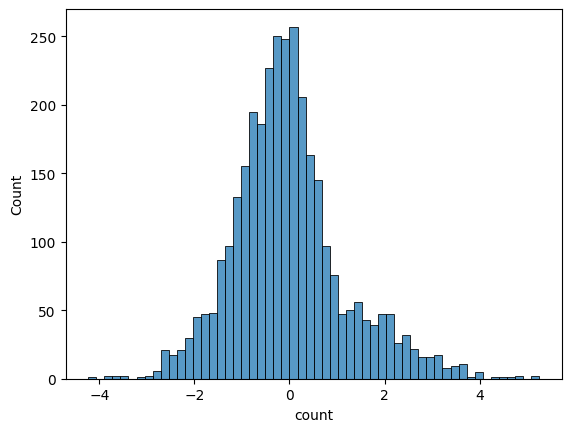

In [180]:
sns.histplot(diff)

In [181]:
test_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [182]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [183]:
test_data['datetime']= pd.to_datetime(test_data['datetime'])

In [184]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [185]:
test_data["year"]= test_data['datetime'].dt.year
test_data["month"]= test_data['datetime'].dt.month
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12


In [186]:
test_data.drop(columns=["datetime"],axis=1,inplace=True)
    

In [187]:
count_pred= regressor.predict(test_data)

In [189]:
test_data["count_pred"]= count_pred

In [190]:
test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,count_pred
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3.555758
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3.107710
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3.107710
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3.084499
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3.084499
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,4.311388
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,4.311388
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,4.569280
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,4.012867


In [195]:
import xgboost as xgb
test_data["count_pred"]= np.exp(test_data["count_pred"])

C:\Users\Sam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [192]:
test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,count_pred
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,35.014332
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,22.369762
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,22.369762
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,21.856522
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,21.856522
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,74.543922
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,74.543922
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,96.474586
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,55.305206


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

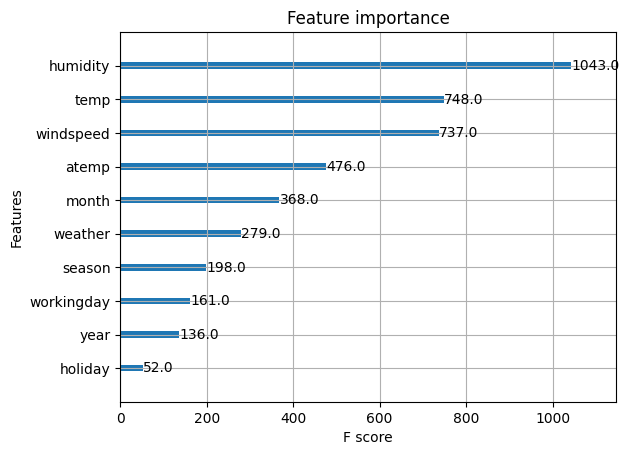

In [196]:

xgb.plot_importance(regressor)

In [197]:
from sklearn.metrics import mean_squared_error
import numpy as np

# For your regression model
y_pred = regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print(f"RMSE: {rmse:.4f}")

RMSE: 1.1839


In [198]:
import os
os.getcwd()

'C:\\Users\\Sam'

In [199]:
# Get the full path of the current notebook
import notebook
import os

# Method 1
print("Notebook path:", os.path.abspath(''))

# Method 2 - Try this for the actual notebook file path
try:
    from IPython import get_ipython
    notebook_path = get_ipython().config['IPKernelApp']['connection_file']
    print("Notebook location:", os.path.dirname(notebook_path))
except:
    print("Could not get exact notebook path")

Notebook path: C:\Users\Sam
Notebook location: C:\Users\Sam\AppData\Roaming\jupyter\runtime
